In [16]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
sample = data.iloc[:660, :]
class_0_count = (sample['Outcome'] == 0).sum()
print("Number of rows in the sample belonging to class 0: ", class_0_count)

Number of rows in the sample belonging to class 0:  436


In [15]:
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
655,2,155,52,27,540,38.7,0.240,25,1
656,2,101,58,35,90,21.8,0.155,22,0
657,1,120,80,48,200,38.9,1.162,41,0
658,11,127,106,0,0,39.0,0.190,51,0


In [19]:
from sklearn.model_selection import train_test_split

predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_train, X_test, y_train, y_test = train_test_split(sample[predictors], sample['Outcome'], test_size=0.2,  shuffle=False)

In [20]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
523,9,130,70,0,0,34.2,0.652,45
524,3,125,58,0,0,31.6,0.151,24
525,3,87,60,18,0,21.8,0.444,21
526,1,97,64,19,82,18.2,0.299,21


In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_leaf=5, random_state=2020)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_samples_leaf=5, random_state=2020)

In [22]:
print("Depth of the decision tree:", clf.get_depth())


Depth of the decision tree: 4


In [23]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(predictors)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

In [24]:
tree = export_graphviz(clf, out_file=None, feature_names=predictors, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(tree)
graph.format = 'png'
graph.render('tree')

'tree.png'

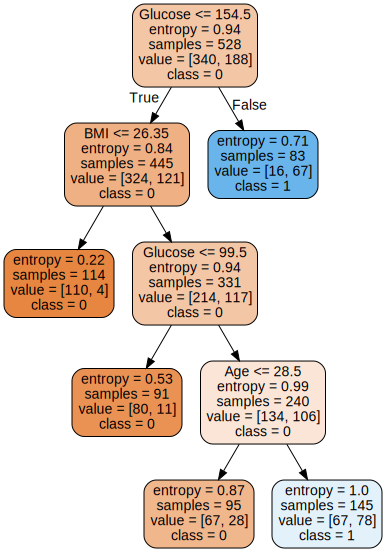

In [25]:
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [26]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print("Macro-F1:", f1_macro)

Accuracy: 0.7894736842105263
Macro-F1: 0.7594315245478036


In [27]:
patients = [751, 748, 754, 746]
X_pred = data.iloc[patients][predictors]
y_pred = clf.predict(X_pred)
print(y_pred)

[0 1 1 0]
